In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import numpy as np
import matplotlib.pyplot as plt
from nmc_verification.nmc_vf_base.tool.plot_tools import add_china_map_2basemap

**在检验或诊断分析的时候，经常需要绘制或输出一些图片以对数据的内容进行浏览。基于matplotlib绘制简单样式的图片并不困难，但也并非一两行代码就能完成，为此本程序库提供了一些绘制图像的工具类函数，据此可以一两行代码内实现比较完整的绘图功能。**  

In [9]:
grid0 = nvb.grid([70,140,1],[15,55,1])
grd = nvb.io.read_griddata_from_nc(r"H:\test_data\input\nvb\test.nc",grid = grid0)  #读取网格数据，用于测试
nvb.set_griddata_coords(grd,name = "Temper_2m",dtime_list = [24],member_list = ["ECMWF"])    #设置数据的时空属性和要素名称
print(grd)

<xarray.DataArray 'Temper_2m' (member: 1, level: 1, time: 1, dtime: 1, lat: 41, lon: 71)>
array([[[[[[25.937511, ..., 28.250004],
           ...,
           [-2.374992, ..., -3.187485]]]]]])
Coordinates:
  * member   (member) <U5 'ECMWF'
  * level    (level) int32 -2147483647
  * time     (time) datetime64[ns] 2001-03-01
  * dtime    (dtime) int32 24
  * lat      (lat) int32 15 16 17 18 19 20 21 22 23 ... 48 49 50 51 52 53 54 55
  * lon      (lon) int32 70 71 72 73 74 75 76 77 ... 134 135 136 137 138 139 140


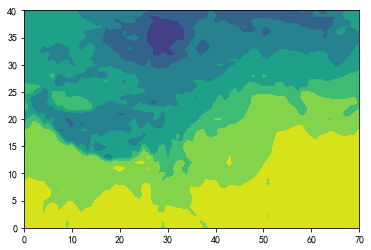

In [6]:
plt.contourf(np.squeeze(grd.values))  #采用默认的绘图设置
plt.show()

如上所示，虽然基于matploblib绘制一个平面场只需要调用plt.contourf()函数就可以完成，但是要对图像的横坐标，纵坐标，标题进行基本的设置，并添加地图和colorbar等元素，另外可能还需将图片保存到指定的路径中，等等这些操作加起来涉及到的代码就不少了。示例代码如下：

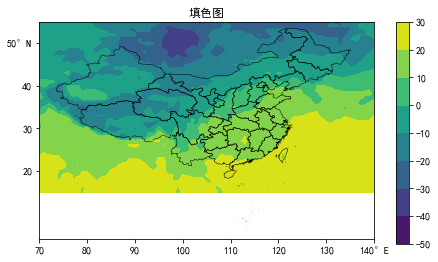

In [48]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure()
ax = plt.axes()
plt.title("填色图")
grid0 = nvb.get_grid_of_data(grd)
mp = Basemap(llcrnrlon=grid0.slon, urcrnrlon=grid0.elon, llcrnrlat=grid0.slat, urcrnrlat=grid0.elat)
add_china_map_2basemap(ax, name='province', edgecolor='k', lw=0.3,encoding = 'gbk') #添加底图
x = grd['lon'].values
y = grd['lat'].values
im = ax.contourf(x, y, np.squeeze(grd.values))
colorbar_position = fig.add_axes([0.95, 0.11, 0.03, 0.77])
plt.colorbar(im,cax= colorbar_position)
xticks = np.arange(70,150,10)
xticks_label = []
for x in range(len(xticks)):
    xticks_label.append(str(xticks[x]))
xticks_label[-1] += "°E"
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_label)
yticks = np.arange(20,60,10)
yticks_label = []
for y in range(len(yticks)):
    yticks_label.append(str(yticks[y]))
yticks_label[-1] += "°N"
ax.set_yticks(yticks)
ax.set_yticklabels(yticks_label)
plt.show()

如上所示，要绘制一个信息稍微完整的平面图涉及到的代码能达到二十多行，而且其中的设置参数都是针对性的，并不具备通用性。为提高效率，本程序将绘制平面图的功能封装成一个函数，在函数内部集成了自动设置坐标标记、标题、colorbar等属性的方法，达到传达基本信息和简洁清晰的需求。其函数模块如下：

### 绘制填色图
**contourf_2d_grid(grd,save_path = None,title = None,clevs= None,cmap = None)**  
将网格数据绘制成填色图。


**参数说明：**  
 **grd**: 网格数据   
 **save_path**: 图片输出路径，缺省时以plt.show()方式交互显示     
 **title**: 图片标题，缺省时自动提取grd中信息生成标题  
 **clevs**: 填色的等级设置  
 **cmaps**: 填色的颜色设置  
 **return**: None   
 **调用示例：**

0.1820230484008789


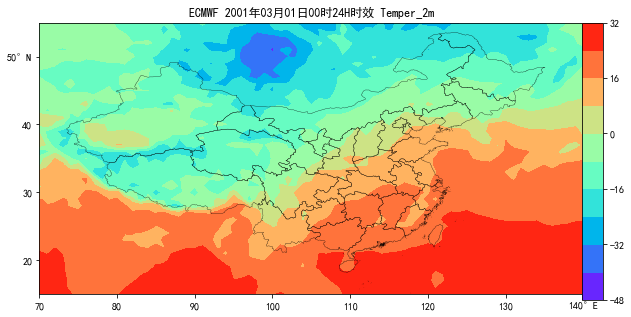

In [53]:
nvb.tool.plot_tools.contourf_2d_grid(grd)  #  可选参数全部缺省时的绘图效果

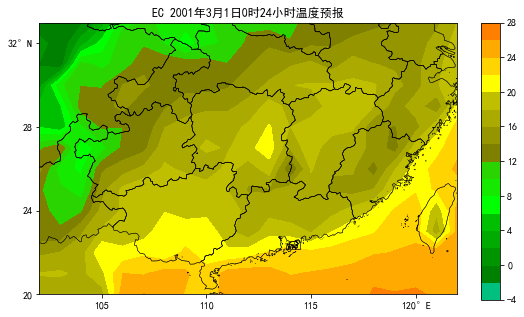

In [13]:
clevs,cmap = nvb.tool.color_tools.clev_cmap_temper_2m()   #导入系统中集成的温度填色设置
nvb.tool.plot_tools.contourf_2d_grid(grd,title = "EC 2001年3月1日0时24小时温度预报",clevs = clevs,cmap =cmap) #带参数的绘图效果

In [16]:
grid1 = nvb.grid([102,122,1],[20,33,1])   #定义一个范围小一些的网格，以此读取相应的数据
grd = nvb.io.read_griddata_from_nc(r"H:\test_data\input\nvb\test.nc",grid = grid1)  
nvb.set_griddata_coords(grd,name = "Temper_2m",member_list = ["ECMWF"])

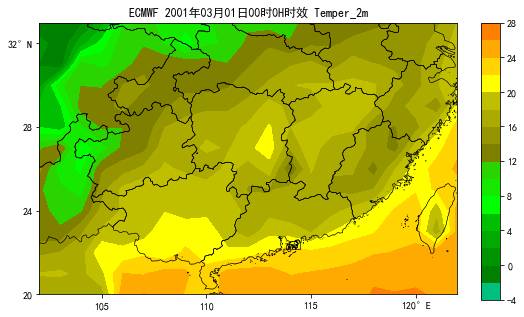

In [17]:
nvb.tool.plot_tools.contourf_2d_grid(grd,clevs = clevs,cmap =cmap)  # 绘制不同范围的填色图

如上所示,contourf_2d_grid 函数可以根据图形的范围自动调整横坐标的间隔。同时对比上面两张图片可以知道，在使用相同的填色设置时，该函数可以在网格范围有变化情况下保持填色的方式不变，而colorbar自动调整。本程序库另外也提供了

### 绘制马赛克图
**pcolormesh_2d_grid(grd,save_path = None,title = None,clevs= None,cmap = None)**  
将网格数据绘制成填色图。


**参数说明：**  
 **grd**: 网格数据   
 **save_path**: 图片输出路径，缺省时以plt.show()方式交互显示     
 **title**: 图片标题，缺省时自动提取grd中信息生成标题  
 **clevs**: 填色的等级设置  
 **cmaps**: 填色的颜色设置  
 **return**: None   
 **调用示例：**

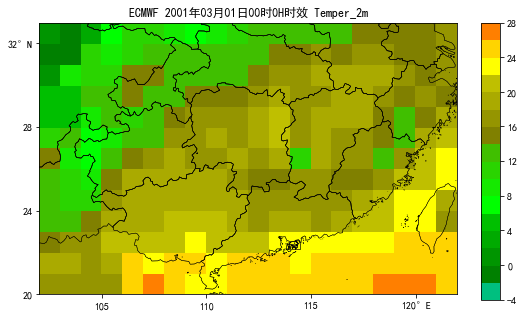

In [20]:
nvb.tool.plot_tools.pcolormesh_2d_grid(grd,clevs = clevs,cmap = cmap)